# Trying different approaches on a classification problem 

# TO DO: 
- final review
- push to github

## Feature description:
- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid') 
rcParams['figure.figsize'] = (10, 5) # define plot sizes

In [87]:
df = pd.read_csv('heart.csv')

In [88]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [89]:
df.shape

(303, 14)

In [90]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# 1.EDA 

In [91]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [92]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Categorical data:

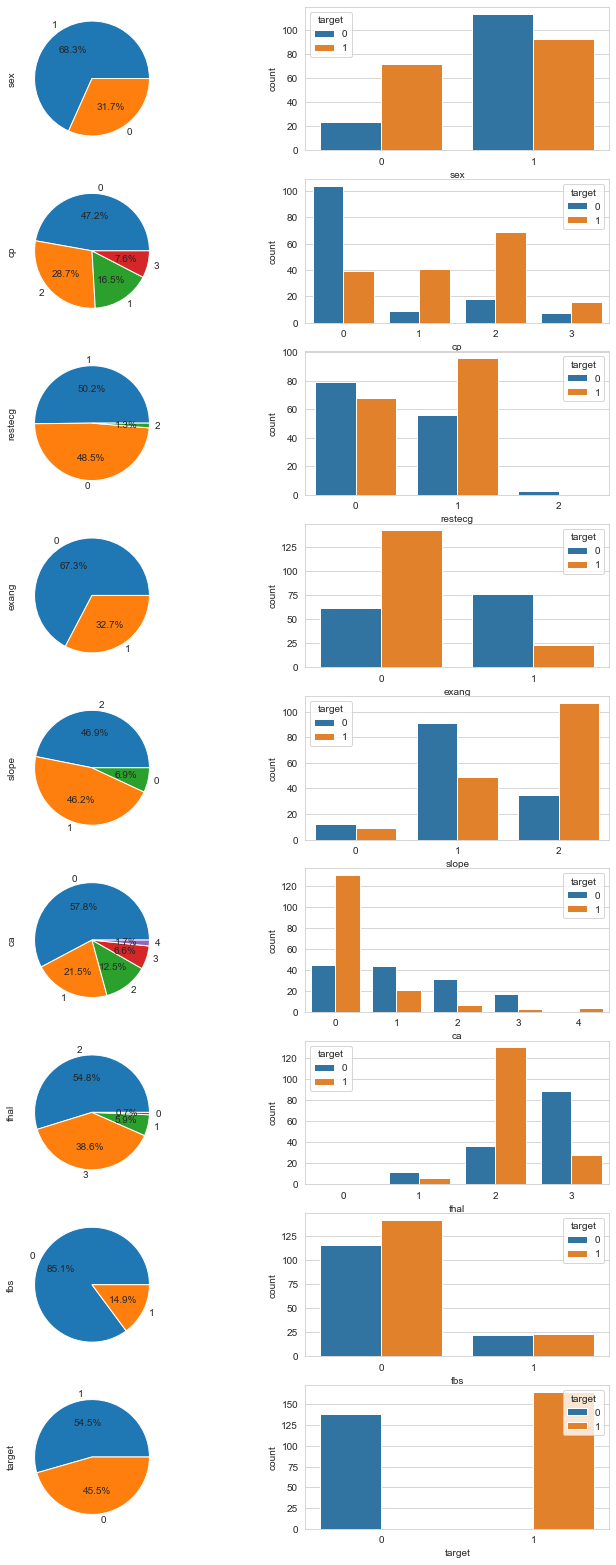

In [93]:
# Cat cols num cols visualizations
cat_col = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca','thal','fbs','target']
num_col = ['age', 'trestbps', 'chol','thalach','oldpeak']

plt.figure(figsize=(12, 28))
count = 1
for cols in cat_col:
    plt.subplot(9, 2, count)
    df[cols].value_counts().plot.pie(shadow=False,autopct='%1.1f%%')
    count +=1
    plt.subplot(9, 2, count)
    sns.countplot(cols, data=df , hue = 'target')
    count+=1

#### Observations:

- There is a clear pattern in gender and target 
- cp - maximum value is 0 (47.2%) i.e. 0 -> 2-> 1 -> 3
- restecg - max occurance is 0(50.2%) & 1 (48.5%), 2 (1.3%) is minimal
- exang - 67.3% have no and 32.7% are yes
- slope - max occurance of 1&2 (46%), 0 is minimal (6.9%)
- ca- values from 0 to 4, 0 -> 1 -> 2 -> 3 -> 4
- thal - 0,1,2,3 ; 2&3 are max, o is min
- fbs - 85.1% = 0 n 14.9%=1
- target - 54.5% have heart diesese, 45.5% have none

### Numerical data:

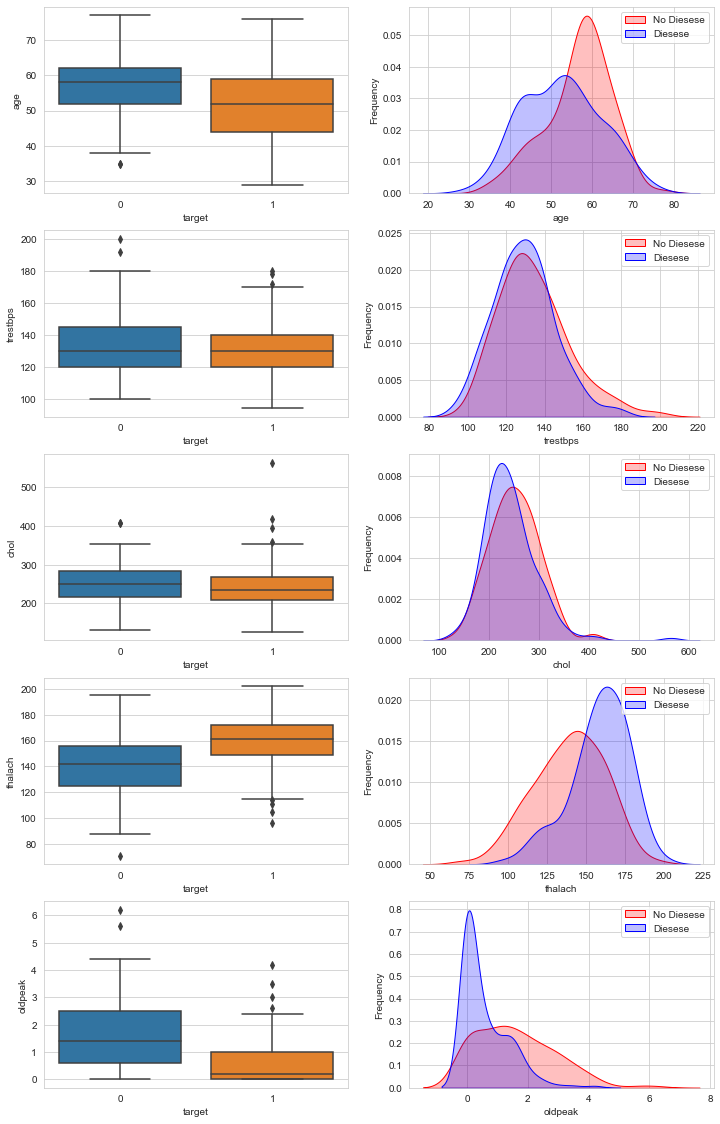

In [94]:
plt.figure(figsize=(12, 24))
count = 1
for cols in num_col:
    # Row 1 
    plt.subplot(6, 2, count)
    sns.boxplot(x='target', y= cols, data= df)
    count +=1
    plt.subplot(6, 2, count)
    # Row 2 
    g = sns.kdeplot(df[cols][(df["target"] == 0) & (df[cols].notnull())], color="Red", shade = True)
    g = sns.kdeplot(df[cols][(df["target"] == 1) & (df[cols].notnull())], ax =g, color="Blue", shade= True)
    g.set_xlabel(cols)
    g.set_ylabel("Frequency")
    g = g.legend(["No Diesese","Diesese"])
    count+=1

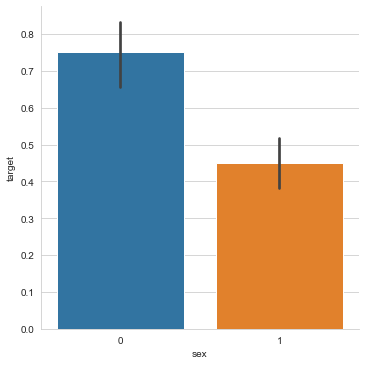

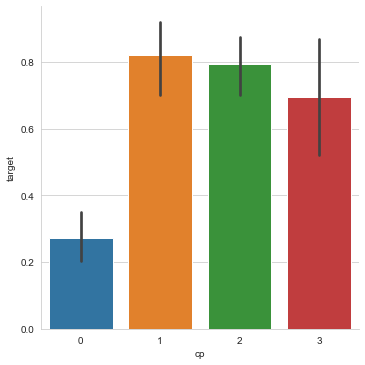

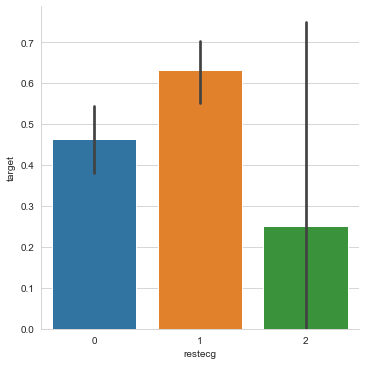

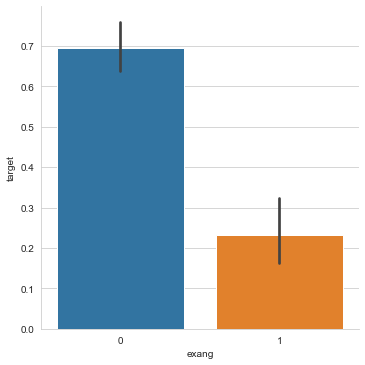

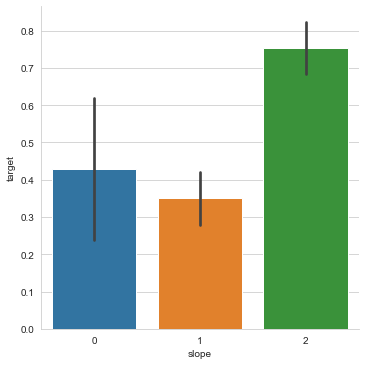

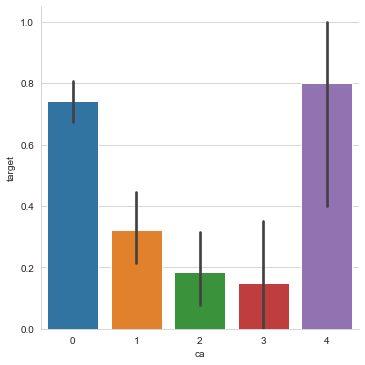

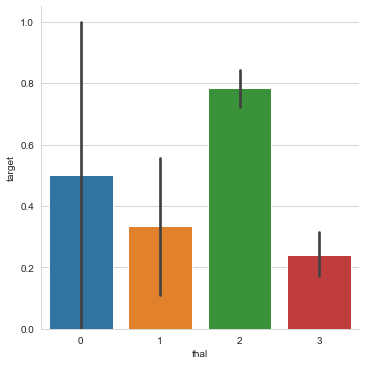

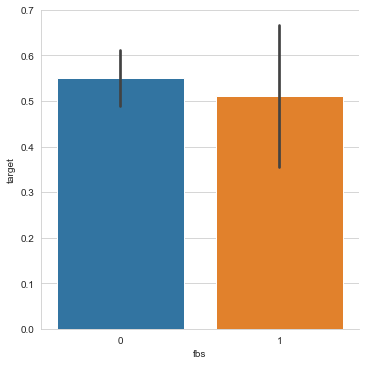

In [95]:
#Categorical Variables : Catplot
for cols in cat_col:
    if cols!='target':
        sns.catplot(x=cols,y='target',kind='bar',data=df)

#### Observations:

- Female have more chance to get heart deseasse than men 
- cp 0 indicates a lower chace of heart desease 
- restecg indicates a lower chace of heart desease 
- exang 1 indicates a lower chace of heart desease 

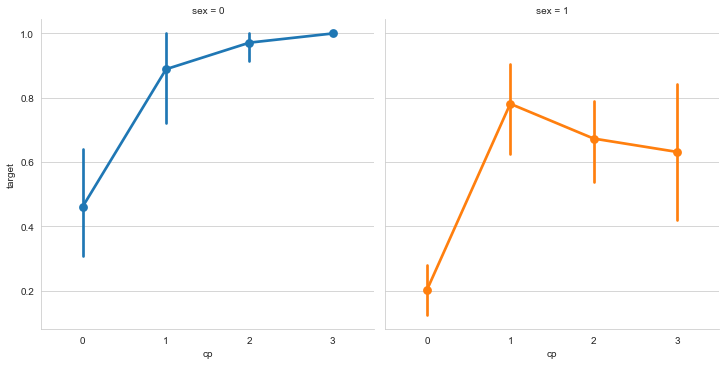

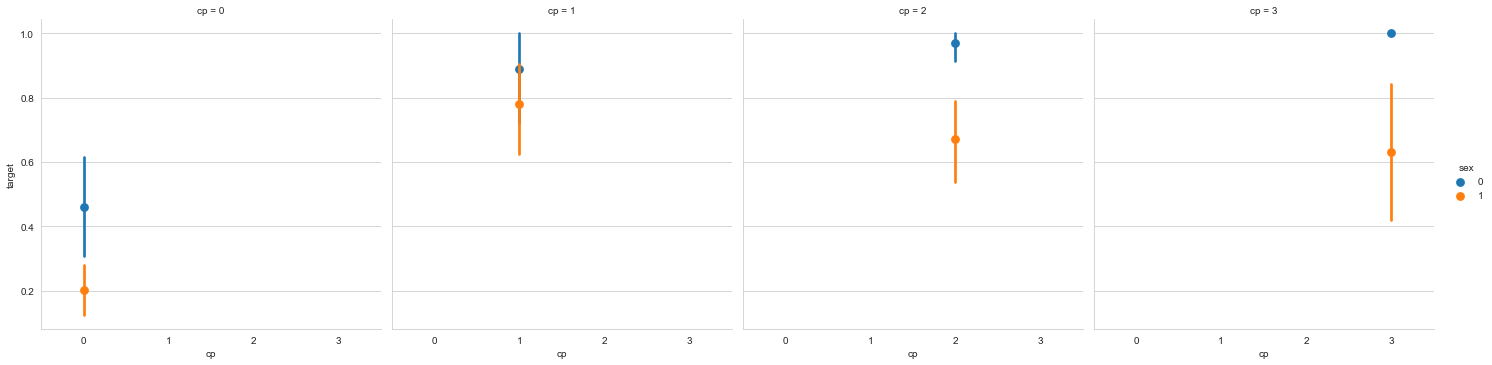

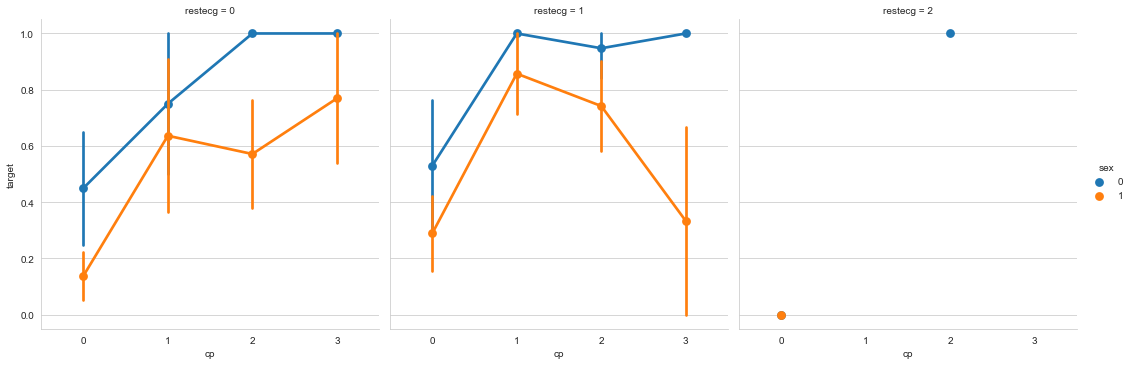

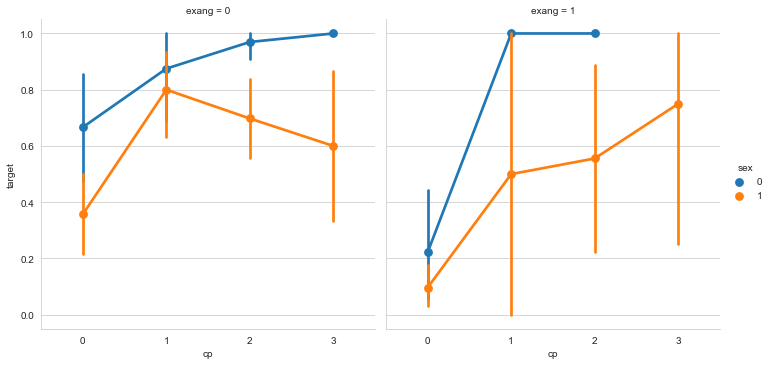

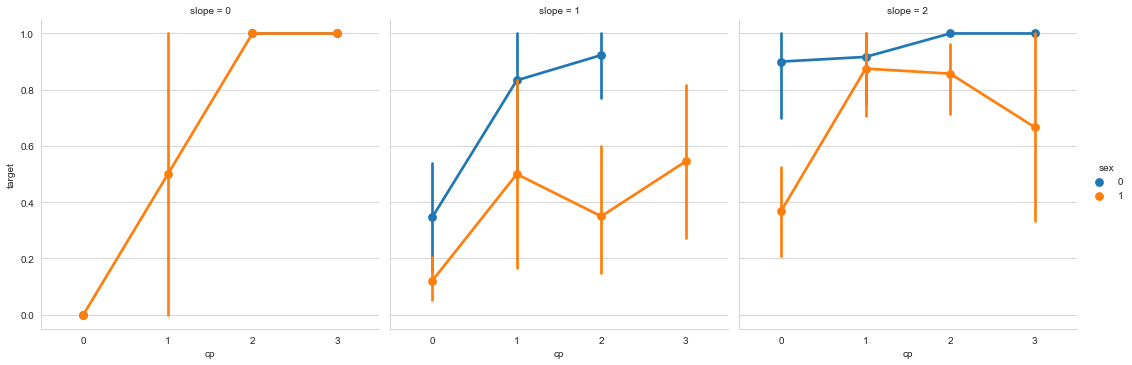

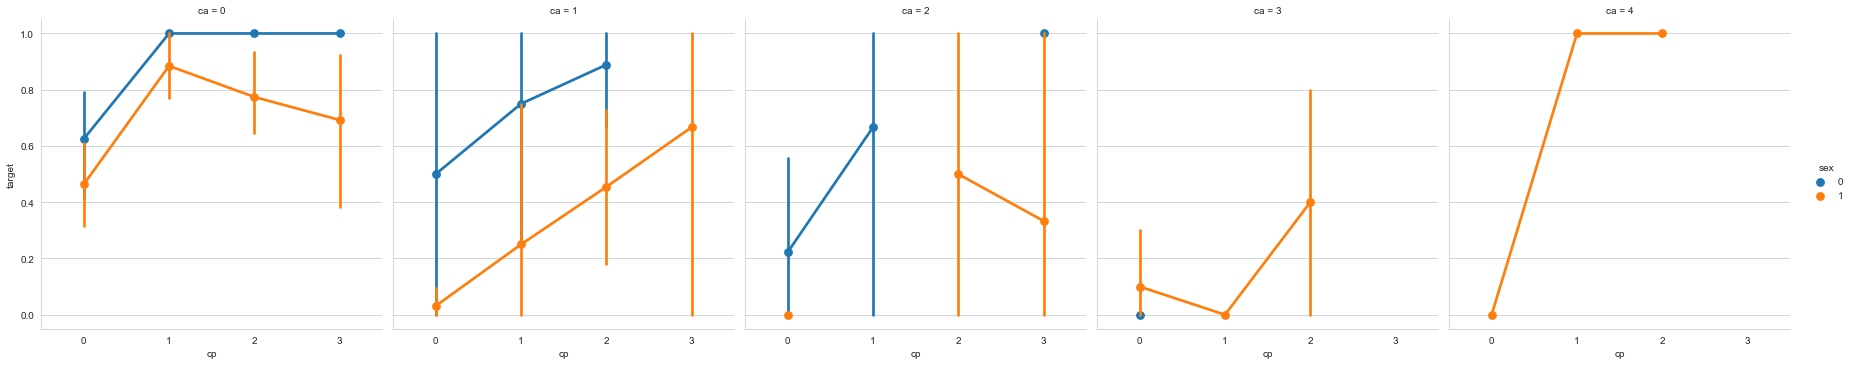

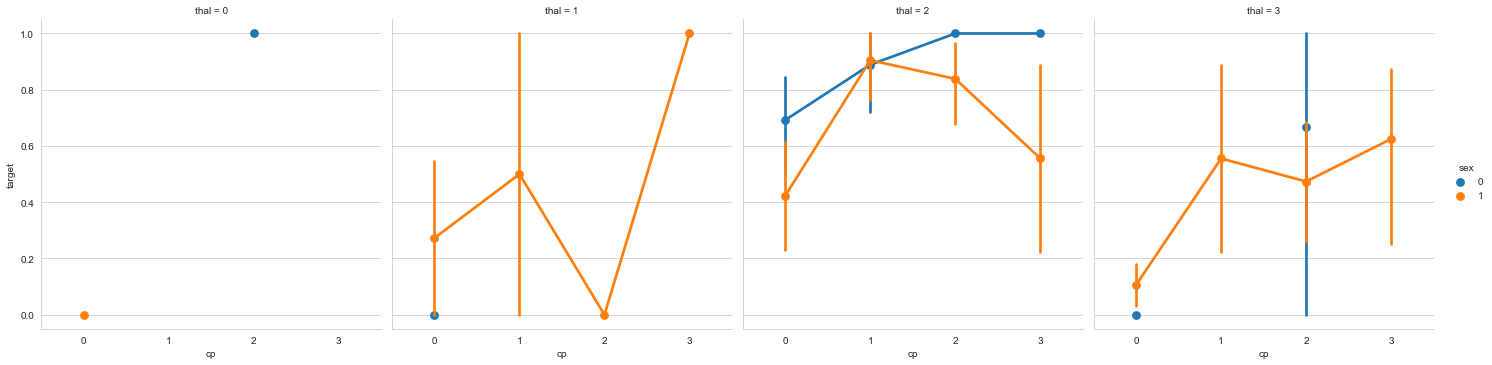

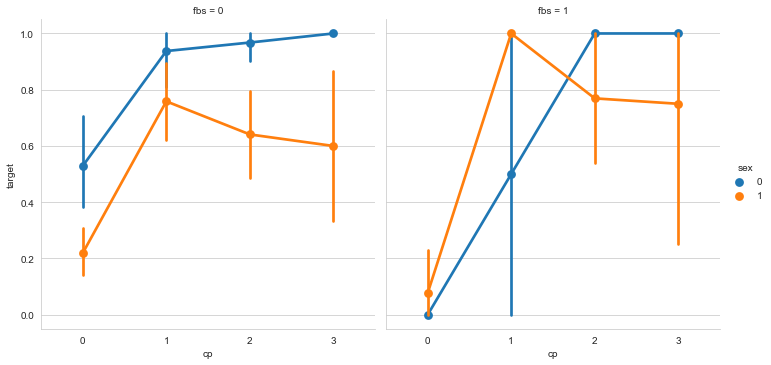

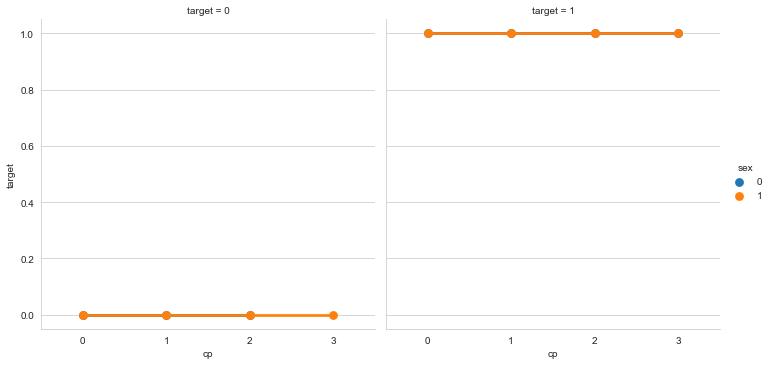

In [96]:
for col in cat_col:
    sns.catplot(x='cp',y='target',kind='point',data = df,col=col,hue='sex')
    plt.show()

**Is there any pearson correlation between variables ?**

<AxesSubplot:>

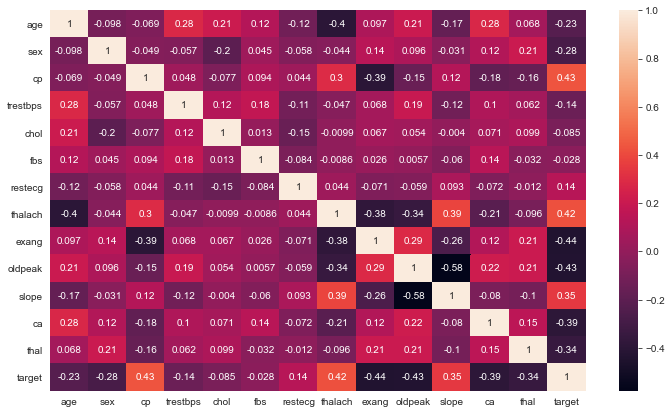

In [97]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr() , annot = True)

In [98]:
# Imbalance is not an issue
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

**There is a higher chance of heart desease within younger patients:**

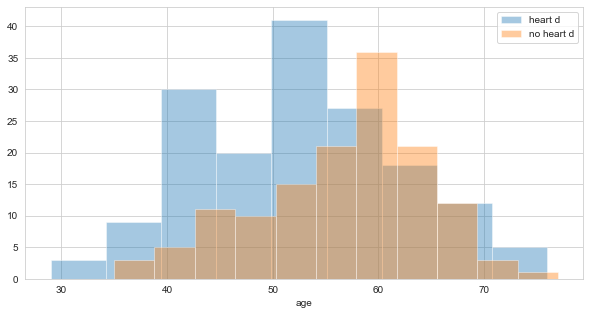

In [99]:
plt.figure(figsize=(10,5))
sns.distplot(df[df['target'] ==1].age , kde = False , label = 'heart d')
sns.distplot(df[df['target'] ==0].age , kde = False, label = 'no heart d')
plt.legend()

**Percentage of patients with heart desease**


<AxesSubplot:xlabel='age'>

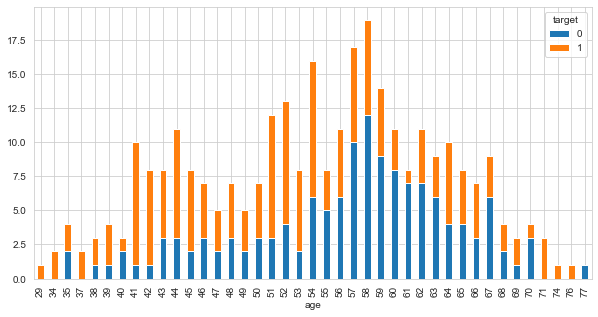

In [100]:
df.groupby(['age' , 'target' ])['target'].size().unstack().plot(kind='bar', stacked=True)

## 1.2 Chisquare test to find similarities between features
The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.

In [111]:
import scipy.stats as stats

# 1 Create a crosstab table

dataset_table = pd.crosstab(df['fbs'],df['target'])
dataset_table

target,0,1
fbs,,
0,116,142
1,22,23


In [112]:
from scipy.stats import chi2

def chi2_wrapper(col_to_test = 'sex' , target_col = 'target' , alpha = 0.05 ):
    print(f'Result for {col_to_test}:')
    dataset_table = pd.crosstab(df[col_to_test],df[target_col])
    Observed_Values = dataset_table.values 
    val = stats.chi2_contingency(dataset_table)
    Expected_Values= val[3] # the 3 is the location of this calculation 
    no_of_rows = len(dataset_table.iloc[0:2,0]) # in this case we have 2 columns and 2 rows 
    no_of_columns=len(dataset_table.iloc[0,0:2])
    ddof=(no_of_rows-1)*(no_of_columns-1) # degreee of freedom 
    chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
    chi_square_statistic = chi_square[0]+chi_square[1]
    critical_value=chi2.ppf(q=1-alpha,df=ddof)
    p_value = 1-chi2.cdf(x=chi_square_statistic,df=ddof)
    
    if chi_square_statistic >= critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")
    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")


In [113]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [114]:
# Choose only categorical variables

cat_cols = ['age', 'sex', 'cp', 'fbs', 'restecg', 
       'exang',  'slope', 'ca', 'thal']

In [115]:
# loop through all the columns

for col in list(cat_cols):
    chi2_wrapper(col_to_test = col , target_col = 'target' , alpha = 0.05 )


Result for age:
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
Result for sex:
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
Result for cp:
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
Result for fbs:
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
Result for restecg:
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
Result for exang:
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
Result for slope:
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a 

### Observations: 
- FBS(Fasting blood sugar)is the only col with no relationship to the target value  

## 1.3 Approximate Bayesian inference for logistic regression

**Bayesian approaches**
Logistic regression.

The problem here is to model how the probability that a person has a heart desease is affected by his/her age,  sex and other features.


Logistic regression models this probabilty in the following way:

$$p(y_i = 1 \mid \beta) = \sigma (\beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_k x_{ik} ), $$

where $\sigma(t) = \frac1{1 + e^{-t}}$


In [186]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [187]:
# add gender column:

df['gender'] = df['sex'].apply(lambda x: 'Male' if x == 1 else 'Female')

In [188]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,gender
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Female


<AxesSubplot:xlabel='gender', ylabel='count'>

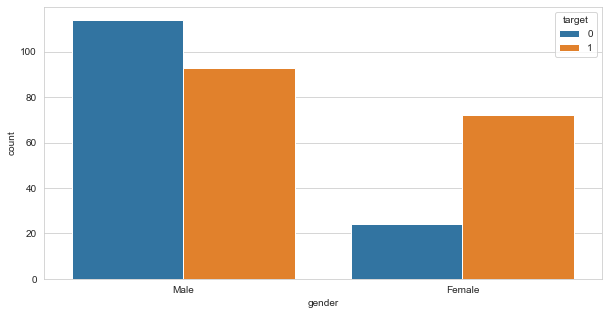

In [189]:
sns.countplot (x = 'gender' ,data = df , hue = 'target')

In [190]:
import pymc3 as pm

In [216]:
#####
# Part 1 
#####

# How do age and sex affect the target:

with pm.Model() as manual_logistic_model:
    # Declare pymc random variables for logistic regression coefficients with uninformative 
    # prior distributions N(0, 100^2) on each weight using pm.Normal. 

    a = pm.Normal('a', mu =0 , sd = 100 )
    b_1 = pm.Normal('b_1', mu =0 , sd = 100 )
    b_2 = pm.Normal('b_2', mu =0 , sd = 100 )

    # Thansform these random variables into vector of probabilities p(y_i=1) using logistic regression model specified 
    # above. PyMC random variables are theano shared variables and support simple mathematical operations.
    # For example:
    # z = pm.Normal('x', 0, 1) * np.array([1, 2, 3]) + pm.Normal('y', 0, 1) * np.array([4, 5, 6])`
    # is a correct PyMC expression.
    # Use pm.invlogit for the sigmoid function.
    
    x_1 = np.array(df['age']) 
    x_2 = np.array(df['chol'])
    p_y = pm.invlogit(a + b_1 * x_1 + b_2 * x_2)     

    # Declare PyMC Bernoulli random vector with probability of success equal to the corresponding value
    # given by the sigmoid function.
    # Supply target vector using "observed" argument in the constructor.

    observations = df['target'].values
    likelihood = pm.Bernoulli('likelihood', p = p_y, observed = df['target'])

    
    # Use pm.find_MAP() to find the maximum a-posteriori estimate for the vector of logistic regression weights.
    map_estimate = pm.find_MAP()
    print(map_estimate)


# Observe that non numerical values are not accepted


{'a': array(3.33160238), 'b_1': array(-0.05050779), 'b_2': array(-0.00160512)}


In [218]:
#####
# Part 2
#####

with pm.Model() as logistic_model:
    
    pm.glm.GLM.from_formula('target ~ age + chol', df, family= 'binomial' )

    map_estimate = pm.find_MAP()
    print(map_estimate)



{'Intercept': array(0.00501325), 'age': array(0.15801024), 'chol': array(0.98742475)}


In [220]:
beta_age_coefficient = map_estimate['age'].tolist()
beta_chol_coefficient =map_estimate['chol'].tolist() 
print(f'age_coefficient: {beta_age_coefficient }')
print(f'chol_coefficient: {beta_chol_coefficient }')

age_coefficient: 0.1580102406493989
chol_coefficient: 0.987424747089898


#### To find credible regions let's perform MCMC inference.

In [194]:
# Visualize the sampling process.

def plot_traces(traces, burnin = 200):
    ''' 
    Convenience function:
    Plot traces with overlaid means and values
    '''
    ax = pm.traceplot(traces[burnin:], figsize=(12,len(traces.varnames)*1.5),
        lines={k: v['mean'] for k, v in pm.summary(traces[burnin:]).iterrows()})

    for i, mn in enumerate(pm.summary(traces[burnin:])['mean']):
        ax[i,0].annotate('{:.2f}'.format(mn), xy=(mn,0), xycoords='df'
                    ,xytext=(5,10), textcoords='offset points', rotation=90
                    ,va='bottom', fontsize='large', color='#AA0022')


#### Metropolis-Hastings
In statistics and statistical physics, the Metropolis–Hastings algorithm is a Markov chain Monte Carlo (MCMC) method for obtaining a sequence of random samples from a probability distribution from which direct sampling is difficult. This sequence can be used to approximate the distribution (e.g. to generate a histogram) or to compute an integral (e.g. an expected value). Metropolis–Hastings and other MCMC algorithms are generally used for sampling from multi-dimensional distributions, especially when the number of dimensions is high. For single-dimensional distributions, there are usually other methods (e.g. adaptive rejection sampling) that can directly return independent samples from the distribution, and these are free from the problem of autocorrelated samples that is inherent in MCMC methods.

In [221]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,gender,age_squared
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Male,3969
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Male,1369
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Female,1681
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Male,3136
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Female,3249


In [225]:
with pm.Model() as logistic_model:
    # Since it is unlikely that the dependency between the age and target is linear, we will include age squared
    # into features so that we can model dependency that favors certain ages.
    # Train Bayesian logistic regression model on the following features: sex, age, age^2, 
    # Use pm.sample to run MCMC to train this model.
    # To specify the particular sampler method (Metropolis-Hastings) to pm.sample,
    # use `pm.Metropolis`.
    # this is the trace of the sampling procedure and will be used
    # to estimate the statistics of the posterior distribution.
    
    df['age_squared'] = df['age'] **2
    pm.glm.GLM.from_formula('target ~ gender + age + age_squared + thalach + chol', df, family = pm.glm.families.Binomial())
    trace = pm.sample(500, step=[pm.Metropolis()])


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [chol]
>Metropolis: [thalach]
>Metropolis: [age_squared]
>Metropolis: [age]
>Metropolis: [gender[T.Male]]
>Metropolis: [Intercept]


Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 20 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [236]:
trace.varnames

['Intercept', 'gender[T.Male]', 'age', 'age_squared', 'thalach', 'chol']

**Nuts sampler**

Use pm.sample without specifying a particular sampling method (pymc3 will choose it automatically). The sampling algorithm that will be used in this case is NUTS, which is a form of Hamiltonian Monte Carlo, in which parameters are tuned automatically. This is an advanced method that we hadn't cover in the lectures, but it usually converges faster and gives less correlated samples compared to vanilla Metropolis-Hastings.

In [228]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,gender,age_squared
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Male,3969
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Male,1369
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Female,1681
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Male,3136
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Female,3249


In [230]:
df2 = df[['target' , 'gender' , 'age' , 'age_squared' , 'thalach' , 'chol']]

In [231]:
with pm.Model() as logistic_model:
    # Train Bayesian logistic regression model on the following features: gender, age, age_squared, educ, hours
    # Use pm.sample to run MCMC to train this model.

    pm.glm.GLM.from_formula('target ~ gender + age + age_squared + thalach + chol', df2 , family = pm.glm.families.Binomial())
    trace = pm.sample(400, step=pm.NUTS())


Only 400 samples in chain.
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [chol, thalach, age_squared, age, gender[T.Male], Intercept]


Sampling 2 chains for 1_000 tune and 400 draw iterations (2_000 + 800 draws total) took 84 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.


**Estimating the odds ratio**

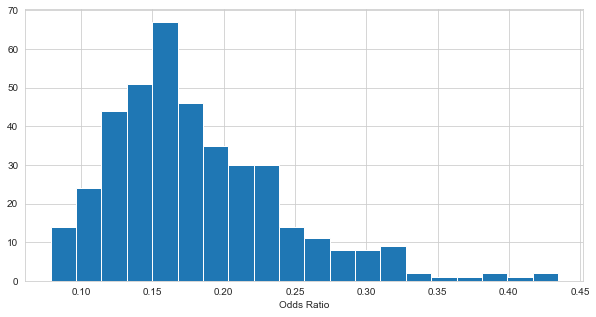

In [233]:
# We don't need to use a large burn-in here, since we initialize sampling
# from a good point (from our approximation of the most probable
# point (MAP) to be more precise).
burnin = 400
b = trace['gender[T.Male]'][burnin:]
plt.hist(np.exp(b), bins=20)
plt.xlabel("Odds Ratio")
plt.show()

In [234]:
# Why do I obtain negative coefficcients 
b

array([-1.64444539, -1.8245199 , -1.72575777, -1.73457158, -1.99783192,
       -1.89391971, -2.3480735 , -1.70143679, -1.83655772, -1.40263134,
       -1.47140677, -1.38240103, -1.60375158, -1.85801773, -1.7820532 ,
       -1.54883311, -1.89340945, -2.25051937, -1.87981795, -1.79665429,
       -1.87387681, -1.80005868, -1.78909753, -1.71545049, -2.03147713,
       -1.45006333, -2.02040162, -1.98034253, -1.93687653, -1.88715902,
       -1.2498565 , -1.0781305 , -0.88282128, -1.8768844 , -1.77178727,
       -1.67826012, -1.87060812, -1.7393723 , -1.66850033, -1.47081859,
       -2.0877232 , -0.93769239, -1.52445486, -1.99733429, -1.65696528,
       -1.55611914, -1.57576162, -1.55237708, -1.44850353, -1.51497443,
       -1.92624682, -1.47006518, -1.41875783, -1.72659915, -1.6418203 ,
       -1.87518131, -1.84794246, -1.73621053, -1.49741635, -1.11289268,
       -1.06043362, -2.23336584, -1.62947396, -1.67495528, -1.81936907,
       -1.74870794, -1.72770029, -1.17692916, -1.89759548, -1.79

# 2. Feature selection 

## 2.1 Univariate feature selection

In [57]:
from sklearn.feature_selection import f_classif , SelectKBest
# train , test split
split = int(len(df) * 0.3)
split 
df2 = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal' , 'target'] ] 

train = df2[split:] 

validation = df2[:split] 

features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'] 

selector = SelectKBest(f_classif, k = len(df2.columns) - 2 ) # to test if fbs will be the only one left out 

X_new = selector.fit_transform(train[features] , train['target'] )

selected_features = pd.DataFrame(selector.inverse_transform(X_new), index = train.index , columns = features)

selected_cols = selected_features.columns[selected_features.var()!= 0]

#### Observe that fbs was the only feature that was left out as in the chi square test

In [58]:
validation [selected_cols ].head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,0,150,0,2.3,0,0,1
1,37,1,2,130,250,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,172,0,1.4,2,0,2
3,56,1,1,120,236,1,178,0,0.8,2,0,2
4,57,0,0,120,354,1,163,1,0.6,2,0,2


In [59]:
selector = SelectKBest(f_classif, k = 1) # to test if fbs will be the only one left out 

X_new = selector.fit_transform(train[features] , train['target'] )

selected_features = pd.DataFrame(selector.inverse_transform(X_new), index = train.index , columns = features)

selected_cols = selected_features.columns[selected_features.var()!= 0]

validation [selected_cols ].head()

,oldpeak
0,2.3
1,3.5
2,1.4
3,0.8
4,0.6


## 2.2 Check feature importance with xgboost & random forest

**Train test split**

In [62]:
# define dataset
X, y = df.drop(['target'  ], axis = 1 ) , df.target
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state= 0 )

[19:45:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

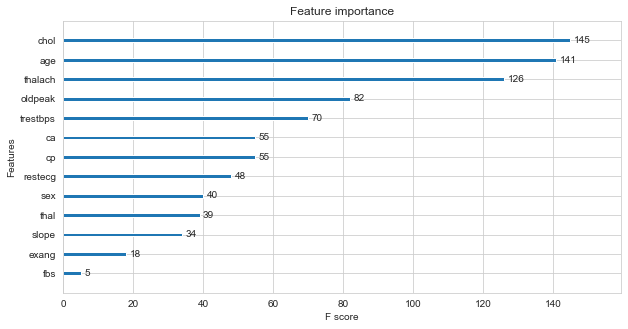

In [63]:
from xgboost import XGBClassifier
from xgboost import plot_importance

xgbmodel = XGBClassifier(random_state = 0 )
xgbmodel.fit(X,y)
plot_importance(xgbmodel)

In [64]:
from sklearn.ensemble import RandomForestClassifier

rfmodel = RandomForestClassifier(random_state = 0)
rfmodel.fit(X,y)

importance = rfmodel.feature_importances_

important_features = pd.DataFrame(data = importance , index=X.columns, columns= ['importance']).sort_values('importance',ascending= False) 

<AxesSubplot:>

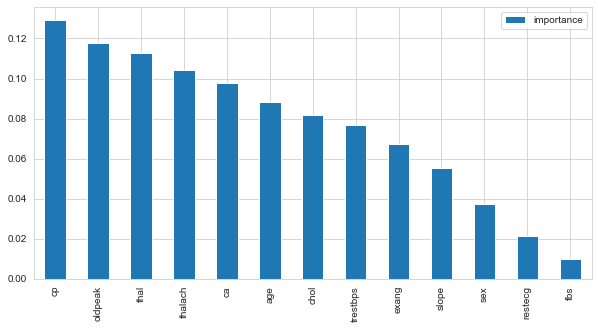

In [65]:
important_features.plot(kind = 'bar')

### Observations:
- We dont want to drop fbs because it provides some kind of information to the model at this will affect our results
- Observe that the top 5 features varies depending on the feature selection  method we use 

# 3. Modelling

In [116]:
# define dataset
X, y = df.drop(['target'  ], axis = 1 ) , df.target

In [117]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [118]:
# One hot encoding

cols = ['sex']
X_dummies = pd.get_dummies(X ,columns = cols ) 

# Observe this method gave us a better score in holdout 

### 3.1 Select the best scaling and normalization method

In [119]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import cross_val_score


def evaluate_model(X,y,model):
    kfold = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3, random_state = 0 )
    scores = cross_val_score(model, X, y, cv = kfold , scoring = 'accuracy' ,  n_jobs=-1)
    return scores

def get_pipelines(model):
    pipelines =  []
    p = Pipeline(steps = [ ('s' , MinMaxScaler()) , ('m',model) ] )
    pipelines.append(('norm' , p))
    
    p = Pipeline(steps = [('s' , StandardScaler()) , ('m',model) ] )
    pipelines.append(('std' , p))

    p = Pipeline(steps = [('s' , QuantileTransformer(n_quantiles=100, output_distribution='normal')) , ('m',model) ] )
    pipelines.append(('qt' , p))
    
    p = Pipeline( [ ('s' , PCA(n_components=7) ) , ('m',model) ]  )
    pipelines.append(('pca' , p))
    
    p = Pipeline([('s',TruncatedSVD(n_components=7)), ('m',model)])
    pipelines.append(('svd', p))
    
    return pipelines  
    

models = []
models.append( LogisticRegression(solver='liblinear' ) )
models.append( RandomForestClassifier() )
models.append( KNeighborsClassifier() ) # without tunning 


names , results , model_name  = list(), list() , list()

for model in models:
    print(model)
    pipelines = get_pipelines(model)
    for name ,pipeline in pipelines: 
        scores = evaluate_model(X, y , pipeline)
        print('>%s: %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
        results.append(scores)
        names.append(name)
                          

LogisticRegression(solver='liblinear')
>norm: 0.821 (0.024)
>std: 0.826 (0.039)
>qt: 0.831 (0.027)
>pca: 0.806 (0.034)
>svd: 0.814 (0.031)
RandomForestClassifier()
>norm: 0.814 (0.036)
>std: 0.815 (0.039)
>qt: 0.813 (0.033)
>pca: 0.778 (0.034)
>svd: 0.796 (0.033)
KNeighborsClassifier()
>norm: 0.819 (0.034)
>std: 0.817 (0.033)
>qt: 0.833 (0.029)
>pca: 0.631 (0.065)
>svd: 0.631 (0.065)


#### Obsevations:
- Normalizaiton and quartile transfomations gives us the best 

### 3.2 General model comparison using cross validation - Comparing a scaled version of data vs non scaled

In [120]:
# Compare all models
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

models = []

models.append(('LR' ,LogisticRegression(random_state = 0 ) ))
models.append(('RF' , RandomForestClassifier(random_state = 0) ))
models.append(('KNN', KNeighborsClassifier(n_neighbors=8)))
models.append(('NB', GaussianNB()))


def model_test_loop(X,y, norm = False , norm_method = StandardScaler()  , cv = 5 ): 
    """
    Function to test normalization methods vs non normalized methods
    """
    scores =[]
    names = []
    
    for name , model in models:
        kfold = model_selection.KFold(n_splits= cv , random_state = 0 , shuffle = True)
        if not norm: 
            score = model_selection.cross_val_score(model, X, y , cv = kfold , scoring = 'accuracy')
            scores.append(score)
            names.append(name)
            msg = "%s: %f (%f)" % (name, score.mean(), score.std())
            print(msg)
        else:
            scaler =  norm_method
            X_scaled = scaler.fit_transform(X)
            y_ = y.values
            score = model_selection.cross_val_score(model, X_scaled, y_ , cv = kfold , scoring = 'accuracy')
            scores.append(score)
            names.append(name)
            msg = "%s: %f (%f)" % (name, score.mean(), score.std())
            print(msg)
            

In [121]:
# With normalization 

model_test_loop(X,y, norm = False , norm_method = StandardScaler()  , cv = 5 )

LR: 0.828361 (0.028825)
RF: 0.838361 (0.045439)
KNN: 0.666721 (0.023378)
NB: 0.835082 (0.046191)


In [122]:
# Without normalization 
model_test_loop(X,y, norm = True , norm_method = StandardScaler()  , cv = 5 )

LR: 0.831749 (0.018552)
RF: 0.835082 (0.042430)
KNN: 0.831639 (0.040949)
NB: 0.835082 (0.046191)


- Observe that KNN gives the lowest score with cross validation due to normalization of data
- A normalized dataset tends to increase the score

### 3.3 KNN (using hold out)

In [74]:
from sklearn.model_selection import train_test_split

X_ = X_dummies.values 
y_ = y.values

scaler1 =  StandardScaler()
#scaler2 = QuantileTransformer(n_quantiles=100, output_distribution='normal')
X_scaled = scaler1.fit_transform(X_)

X_train, X_valid ,y_train ,y_valid = train_test_split(X_scaled ,y_, test_size  = 0.2, random_state=0)

In [75]:
Misclassified_sample = []

for i in range(1, 30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_valid)
    Misclassified_sample.append((y_valid != pred_i).sum())
    
print("Misclassified_sample = ", Misclassified_sample)

Misclassified_sample =  [11, 11, 10, 9, 10, 9, 10, 6, 9, 7, 11, 11, 10, 8, 9, 8, 9, 9, 10, 10, 10, 9, 10, 9, 10, 10, 12, 12, 13]


<AxesSubplot:>

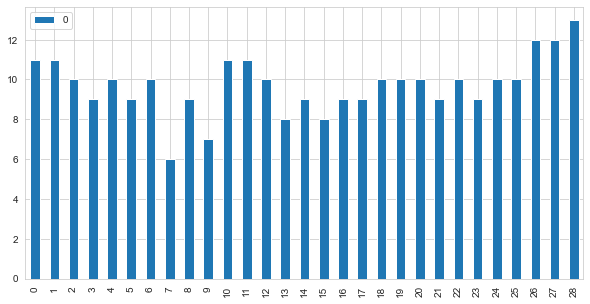

In [76]:
# Find the lowest value:
pd.DataFrame(Misclassified_sample).plot(kind='bar')

#### Results with 2 columns in gender: 

accuracy_score KNN=8 : 0.9016393442622951


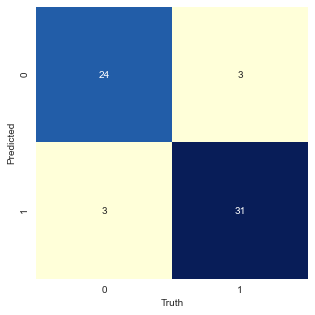

In [77]:
knn_model = KNeighborsClassifier(n_neighbors = 8)

# Fitting the values fo X and Y
knn_model.fit(X_train, y_train)

#Predicting the test values with Model
prediction =  knn_model.predict(X_valid)
###### confusion matrix  starts ######
from sklearn.metrics import accuracy_score, confusion_matrix
cm_knn = confusion_matrix(y_valid,prediction) 
names = np.unique(prediction)
sns.heatmap(cm_knn, square=True, annot=True, cbar = False,xticklabels=names, yticklabels=names, cmap="YlGnBu" ,fmt='g')
plt.xlabel('Truth')
plt.ylabel('Predicted')

#calculating the accuracy
accuracy_score = accuracy_score(y_valid,prediction)
print("accuracy_score KNN=8 :",accuracy_score)

#### Results with 1 column in gender: 

accuracy_score KNN=8 : 0.8852459016393442


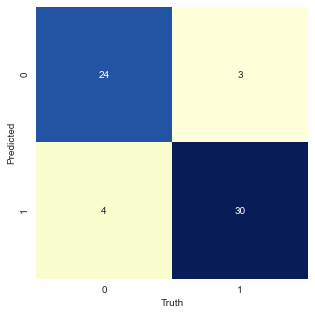

In [49]:
# knn_model = KNeighborsClassifier(n_neighbors=8)

# # Fitting the values fo X and Y
# knn_model.fit(X_train, y_train)

# #Predicting the test values with Model
# prediction =  knn_model.predict(X_valid)
# ###### confusion matrix  starts ######
# from sklearn.metrics import accuracy_score, confusion_matrix
# cm_knn = confusion_matrix(y_valid,prediction) 
# names = np.unique(prediction)
# sns.heatmap(cm_knn, square=True, annot=True, cbar = False,xticklabels=names, yticklabels=names, cmap="YlGnBu" ,fmt='g')
# plt.xlabel('Truth')
# plt.ylabel('Predicted')

# #calculating the accuracy
# accuracy_score = accuracy_score(y_valid,prediction)
# print("accuracy_score KNN=8 :",accuracy_score)

### 3.4 Test the model on a new patient

In [82]:
# Generete a random id 
import random
cols = ['sex']
df_dummies = pd.get_dummies(df ,columns = cols ) 
random_ind = random.randint(0,len(df_dummies))

new_patient = df_dummies.drop(['target'],axis=1).iloc[random_ind]
new_patient

age          54.0
cp            1.0
trestbps    132.0
chol        288.0
fbs           1.0
restecg       0.0
thalach     159.0
exang         1.0
oldpeak       0.0
slope         2.0
ca            1.0
thal          2.0
sex_0         1.0
sex_1         0.0
Name: 93, dtype: float64

In [83]:
new_patient.shape

(14,)

In [84]:
our_prediction = knn_model.predict(new_patient.values.reshape(1,14))
our_prediction 

array([1])

In [85]:
df.iloc[random_ind]

age          54.0
sex           0.0
cp            1.0
trestbps    132.0
chol        288.0
fbs           1.0
restecg       0.0
thalach     159.0
exang         1.0
oldpeak       0.0
slope         2.0
ca            1.0
thal          2.0
target        1.0
Name: 93, dtype: float64

**Discover where I am doing bad predictions**

In [550]:
# Redifine X_valid 
X_train, X_valid ,y_train ,y_valid = train_test_split(X ,y, test_size  = 0.2, random_state=0)


In [553]:
X_valid['actual'] = y_valid
X_valid['pred'] = prediction

In [567]:
X_valid['correct_or_not'] =  X_valid.actual - X_valid.pred 
X_valid['correct_or_not'] =  X_valid['correct_or_not'].apply(lambda x: 'correct' if x == 0 else 'not_correct' )

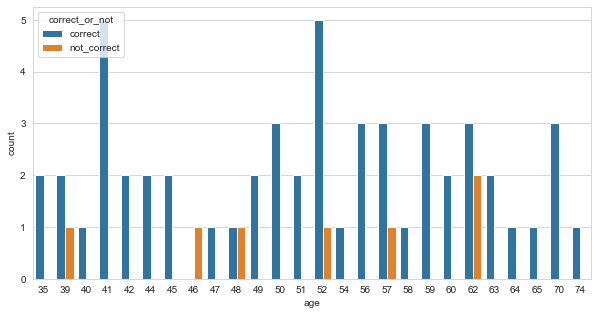

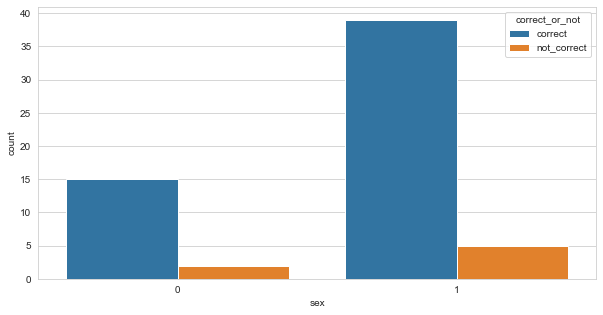

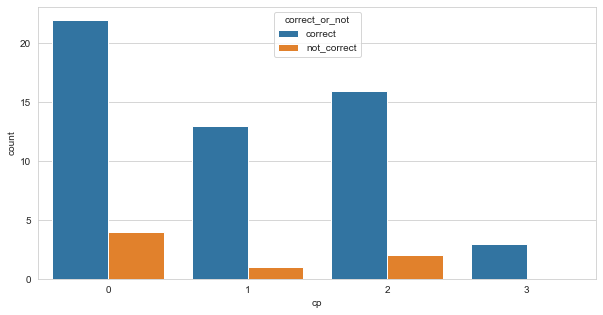

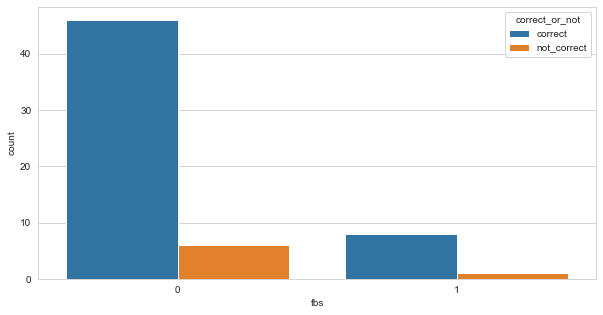

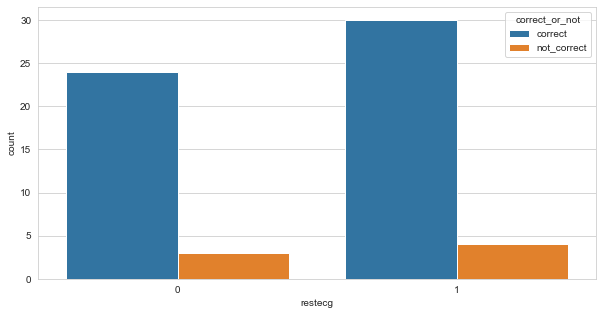

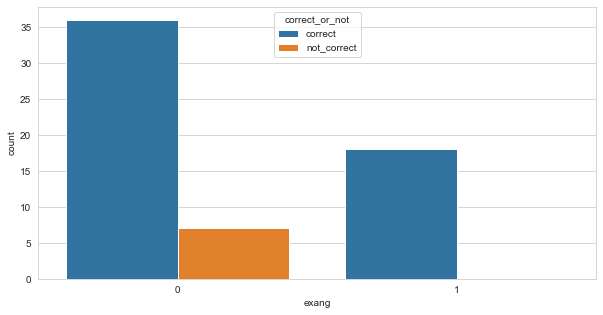

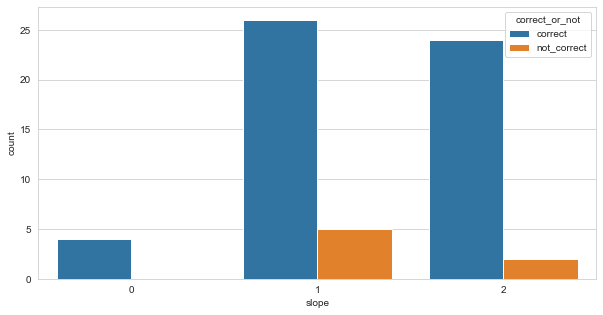

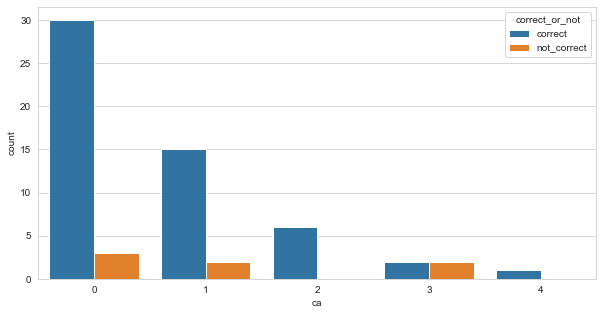

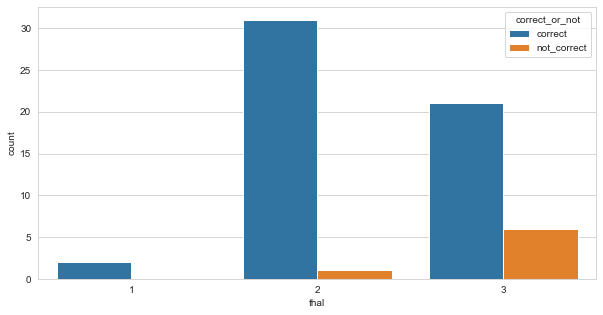

In [572]:
for col in cat_cols:
    sns.countplot(x = col , data = X_valid , hue = 'correct_or_not')
    plt.show()

#### Observations:
- We obtained a better score with an extra column for gender

### 3.5 Autoencoders

Autoencoder is not a classifier, it is a nonlinear feature extraction technique. This is a dimensionality reduction technique, which is basically used before classification of high dimensional dataset to remove the redundant information from the data. Autoencoder architecture also known as nonlinear generalization of Principal Component Analysis. Autoencoder is a neural network (also can be used as a tool to learn deep neural network) which is trained to replicate its input (i.e. original dataset) to its output, through encoding and decoding operation; and the encoded dataset are used as dimensionally reduced features.

**Baseine model Logistic Regression**

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model


# number of input columns
n_inputs = X_dummies.shape[1]

# X_ = X_dummies.values 
# y_ = y.values

# scaler =  StandardScaler()
# X_scaled = scaler.fit_transform(X_)

# X_train, X_valid ,y_train ,y_valid = train_test_split(X_scaled ,y_, test_size  = 0.2, random_state=0)


# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2, random_state=0) # OBSERVE that if I pass values I will get a lower score 

# scale data - Redifine train and test 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
# fit model on training set
model.fit(X_train, y_train)
# make prediction on test set
yhat = model.predict(X_test)
# calculate accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

0.8524590163934426


**Autoencoders + Logist Regression**

In [178]:
######
# Model Arquitecture
#####

def create_encoder(epochs = 200, batch_size=32 , e_m = False):
    # define encoder
    visible = Input(shape = (n_inputs,))
    encoder = Dense(n_inputs*2)(visible)
    encoder = BatchNormalization()(encoder)
    encoder= LeakyReLU()(encoder)
    encoder = Dense(n_inputs)(encoder)
    encoder = BatchNormalization()(encoder)
    encoder = LeakyReLU()(encoder)

    n_bottleneck = round(float(n_inputs) / 2.0)
    bottleneck = Dense(n_bottleneck)(encoder)
     # define decoder 
    decoder = Dense(n_inputs)(bottleneck)
    decoder = BatchNormalization()(decoder)
    decoder = LeakyReLU()(decoder)
    decoder= Dense(n_inputs*2)(decoder)
    decoder = BatchNormalization()(decoder)
    decoder= LeakyReLU()(decoder)
    output = Dense(n_inputs, activation='linear')(decoder)
    model = Model(inputs=visible, outputs=output)
    model.compile(optimizer='adam', loss='mse' , metrics=["accuracy"] )
    if not e_m:
        return model 
    else:
        history = model.fit(X_train, X_train, epochs = epochs, batch_size= batch_size, verbose = 2, validation_data=(X_test,X_test))
        encoder = Model(inputs=visible, outputs=bottleneck)
        return encoder 
    


#### Untuned model - Hypeparamter tunning 

In [185]:
######
# Encode - decode X_train , X_test
#####

# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define the model
model = LogisticRegression()

# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

0.819672131147541


#### Tuned model - Hypeparamter tunning 

In [175]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

parameters = {
    'epochs' :[10, 50, 100,200, 250],    
    'batch_size' :[10, 20, 40, 60, 80, 100]
}

model_hp = KerasClassifier(build_fn = create_encoder , verbose = 0  )

In [176]:
X_train_scaled = scaler.transform(X_dummies)

grid_search = GridSearchCV(estimator = model_hp  , param_grid = parameters , n_jobs = -1 ) # obvserve that I dont need to use cross validation when passing train dataset

grid_search.fit(X_train_scaled , y)


GridSearchCV(estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x1455ba950>,
             n_jobs=-1,
             param_grid={'batch_size': [10, 20, 40, 60, 80, 100],
                         'epochs': [10, 50, 100, 200, 250]})

In [177]:
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best: 0.128579 using {'batch_size': 80, 'epochs': 100}


In [181]:
# test tunned model

tunned_encoder = create_encoder(epochs = 100, batch_size=80 , e_m = True)

Epoch 1/100
4/4 - 2s - loss: 1.6125 - accuracy: 0.1198 - val_loss: 0.8958 - val_accuracy: 0.2131
Epoch 2/100
4/4 - 0s - loss: 1.4432 - accuracy: 0.1488 - val_loss: 0.8823 - val_accuracy: 0.2459
Epoch 3/100
4/4 - 0s - loss: 1.3173 - accuracy: 0.2066 - val_loss: 0.8703 - val_accuracy: 0.2623
Epoch 4/100
4/4 - 0s - loss: 1.2017 - accuracy: 0.2107 - val_loss: 0.8603 - val_accuracy: 0.2787
Epoch 5/100
4/4 - 0s - loss: 1.1115 - accuracy: 0.2107 - val_loss: 0.8495 - val_accuracy: 0.2623
Epoch 6/100
4/4 - 0s - loss: 1.0600 - accuracy: 0.2397 - val_loss: 0.8396 - val_accuracy: 0.2623
Epoch 7/100
4/4 - 0s - loss: 0.9953 - accuracy: 0.2438 - val_loss: 0.8306 - val_accuracy: 0.2459
Epoch 8/100
4/4 - 0s - loss: 0.9568 - accuracy: 0.2438 - val_loss: 0.8227 - val_accuracy: 0.2295
Epoch 9/100
4/4 - 0s - loss: 0.9200 - accuracy: 0.2686 - val_loss: 0.8152 - val_accuracy: 0.2295
Epoch 10/100
4/4 - 0s - loss: 0.9025 - accuracy: 0.2521 - val_loss: 0.8082 - val_accuracy: 0.2295
Epoch 11/100
4/4 - 0s - loss:

Epoch 85/100
4/4 - 0s - loss: 0.5351 - accuracy: 0.4339 - val_loss: 0.5195 - val_accuracy: 0.4426
Epoch 86/100
4/4 - 0s - loss: 0.5388 - accuracy: 0.4298 - val_loss: 0.5181 - val_accuracy: 0.4426
Epoch 87/100
4/4 - 0s - loss: 0.5378 - accuracy: 0.4008 - val_loss: 0.5172 - val_accuracy: 0.4426
Epoch 88/100
4/4 - 0s - loss: 0.5409 - accuracy: 0.4174 - val_loss: 0.5149 - val_accuracy: 0.4426
Epoch 89/100
4/4 - 0s - loss: 0.5318 - accuracy: 0.4504 - val_loss: 0.5138 - val_accuracy: 0.4426
Epoch 90/100
4/4 - 0s - loss: 0.5316 - accuracy: 0.4174 - val_loss: 0.5124 - val_accuracy: 0.4426
Epoch 91/100
4/4 - 0s - loss: 0.5302 - accuracy: 0.4256 - val_loss: 0.5117 - val_accuracy: 0.4426
Epoch 92/100
4/4 - 0s - loss: 0.5254 - accuracy: 0.4339 - val_loss: 0.5105 - val_accuracy: 0.4426
Epoch 93/100
4/4 - 0s - loss: 0.5241 - accuracy: 0.4174 - val_loss: 0.5095 - val_accuracy: 0.4590
Epoch 94/100
4/4 - 0s - loss: 0.5221 - accuracy: 0.4463 - val_loss: 0.5100 - val_accuracy: 0.4590
Epoch 95/100
4/4 - 0

In [182]:
# testing hyperparams 
plot_model(tunned_encoder , 'encoder_compress.png', show_shapes=True)
# save the encoder to file
tunned_encoder.save('tunned_encoder.h5')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
Epoch 1/200
8/8 - 2s - loss: 1.5811 - val_loss: 0.9414
Epoch 2/200
8/8 - 0s - loss: 1.2533 - val_loss: 0.9000
Epoch 3/200
8/8 - 0s - loss: 1.0592 - val_loss: 0.8690
Epoch 4/200
8/8 - 0s - loss: 0.9339 - val_loss: 0.8428
Epoch 5/200
8/8 - 0s - loss: 0.8260 - val_loss: 0.8202
Epoch 6/200
8/8 - 0s - loss: 0.7522 - val_loss: 0.8007
Epoch 7/200
8/8 - 0s - loss: 0.7172 - val_loss: 0.7833
Epoch 8/200
8/8 - 0s - loss: 0.6775 - val_loss: 0.7676
Epoch 9/200
8/8 - 0s - loss: 0.6399 - val_loss: 0.7528
Epoch 10/200
8/8 - 0s - loss: 0.6003 - val_loss: 0.7355
Epoch 11/200
8/8 - 0s - loss: 0.5872 - val_loss: 0.7171
Epoch 12/200
8/8 - 0s - loss: 0.5593 - val_loss: 0.6985
Epoch 13/200
8/8 - 0s - loss: 0.5344 - val_loss: 0.6807
Epoch 14/200
8/8 - 0s - loss: 0.5257 - val_loss: 0.6634
Epoch 15/200
8/8 - 0s - loss: 0.5197 - val_loss: 0.6464
Epoch 16/200
8/8 - 0s

8/8 - 0s - loss: 0.2704 - val_loss: 0.2733
Epoch 145/200
8/8 - 0s - loss: 0.2738 - val_loss: 0.2729
Epoch 146/200
8/8 - 0s - loss: 0.2751 - val_loss: 0.2722
Epoch 147/200
8/8 - 0s - loss: 0.2682 - val_loss: 0.2716
Epoch 148/200
8/8 - 0s - loss: 0.2739 - val_loss: 0.2718
Epoch 149/200
8/8 - 0s - loss: 0.2845 - val_loss: 0.2707
Epoch 150/200
8/8 - 0s - loss: 0.2783 - val_loss: 0.2698
Epoch 151/200
8/8 - 0s - loss: 0.2923 - val_loss: 0.2684
Epoch 152/200
8/8 - 0s - loss: 0.2721 - val_loss: 0.2668
Epoch 153/200
8/8 - 0s - loss: 0.2678 - val_loss: 0.2660
Epoch 154/200
8/8 - 0s - loss: 0.2643 - val_loss: 0.2665
Epoch 155/200
8/8 - 0s - loss: 0.2845 - val_loss: 0.2660
Epoch 156/200
8/8 - 0s - loss: 0.2631 - val_loss: 0.2655
Epoch 157/200
8/8 - 0s - loss: 0.2706 - val_loss: 0.2649
Epoch 158/200
8/8 - 0s - loss: 0.2611 - val_loss: 0.2649
Epoch 159/200
8/8 - 0s - loss: 0.2627 - val_loss: 0.2633
Epoch 160/200
8/8 - 0s - loss: 0.2596 - val_loss: 0.2632
Epoch 161/200
8/8 - 0s - loss: 0.2564 - val_l

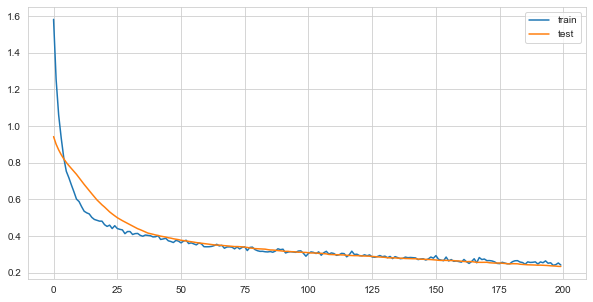

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [134]:
# plot the autoencoder
plot_model(model, 'autoencoder_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs = 200, batch_size=32, verbose = 2, validation_data=(X_test,X_test))
# plot loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder2.h5')

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model

# load the model from file
encoder = load_model('encoder2.h5', compile = False)
tunned_encoder = load_model('tunned_encoder.h5', compile = False)

In [184]:
######
# Encode - decode X_train , X_test
#####

# encode the train data
X_train_encode = tunned_encoder.predict(X_train)
# encode the test data
X_test_encode = tunned_encoder.predict(X_test)
# define the model
model = LogisticRegression()

# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

0.8360655737704918


In [ ]:
#0.78 with 200 epochs 

### Observations:

- In this case autoencoders and Logistic regression are performing fairly similar
- There is no improvement if I increase the n epochs from 200 to 400 
- There is an increase of accuracy after performing hyperparamter tuning 

# Final observations:
- Feature selection methods and chi-square tend to give the same level of importance to features. The level of importance is different depending on the method we use (XGBOOST , Random Forest).
- I this case we used feature selection only to understand the importance of certain features since the number of columns was not huge compared to the number of rows
- No conclusion for Bayesian inference for logistic regression. 
- Normalisation improves the score for almost all algorithms used in this notebook(Logistic Regression, Random Forest  , KNN  ) except for Naive Bayes Classifier.
- An extra column tends to improve the score. 
- Hold out method gives a higher score than cross validation since we are testing our model on a specific/small sample of the dataset compared to cross validation methods. 
- There was an improvement in score after performing hyper parameter tuning.


# Next Steps:
- Bayesian inference for logistic regression

**----------------Request----------------** 

In [178]:
import datetime
# # 1 Get the current path 

# s = ! pwd
# current_path = ''
# for i in s: 
#     current_path+= i
# 2 Pull request
! git pull

# 3
now = datetime.datetime.now()
commit_message = "Last run on " + str(now)
! cd '/Users/Tabe/Desktop/Courses/Data-Science /Test-Projects/Machine-Learning-Projects/Machine-Learning-Projects/Auto-encoders for classification'
! echo $commit_message > commit_message.txt
! git add . 
! git commit -F commit_message.txt
! git push origin main # here I choose either master or branch 
print ('Done!')

Already up to date.
/bin/bash: line 0: cd: /Users/Tabe/Desktop/Courses/Data-Science /Test-Projects/Machine-Learning-Projects/Machine-Learning-Projects/Auto-encoders for classification: No such file or directory
[main f480b45] Last run on 2020-12-15 07:57:46.180655
 3 files changed, 2960 insertions(+), 116 deletions(-)
Enumerating objects: 11, done.
Counting objects: 100% (11/11), done.
Delta compression using up to 4 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (6/6), 187.85 KiB | 11.74 MiB/s, done.
Total 6 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/tabers77/Machine-Learning-Projects.git
   2e66fac..f480b45  main -> main
Done!
